### Air Passenger time series analysis

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [3]:
df_airline=pd.read_csv('air_passenger.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [4]:
df_airline.shape

(146, 2)

In [5]:
df_airline.isnull().sum()

Month                      1
Thousands of Passengers    2
dtype: int64

In [6]:
df_airline.tail()

,Month,Thousands of Passengers
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,NaN,NaN
145,International airline passengers: monthly tota...,NaN


In [7]:
df_airline.dropna(axis=0,inplace=True)

In [8]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [9]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [10]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [11]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [12]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [13]:
df_airline.set_index('Month',inplace=True)

In [14]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<AxesSubplot:xlabel='Month'>

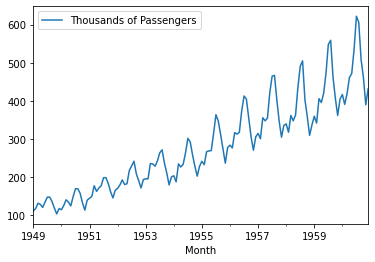

In [15]:
df_airline.plot()

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [18]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060423
p- value: 0.9918802434376409
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### Use first diffrence

In [19]:
## Use Techniques Differencing
df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [20]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [21]:
adf_test(df_airline['Passengers First Difference'].dropna())  #drop 1st na value and check 1st diffrence is stationary

ADF Statistics: -2.8292668241699874
p- value: 0.05421329028382711
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


1st diffrence are shows that data are not stationary

### Use second diffrence

In [22]:
## Use Techniques Differencing
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)

In [23]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics: -16.384231542468513
p- value: 2.7328918500142026e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


### Use 12 month diffrece

In [24]:
### 12 months 
## Use Techniques Differencing
df_airline['Passengers 12 Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)

In [25]:
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.3830207264924805
p- value: 0.011551493085514982
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


### plot PACF and ACF graph

#### 1)plot graphs on 2nd diffrences

In [26]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

C:\Users\Sai\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


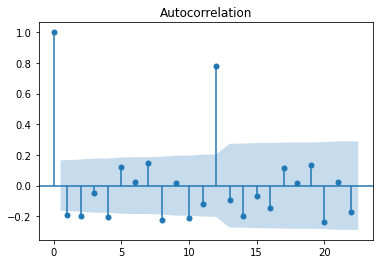

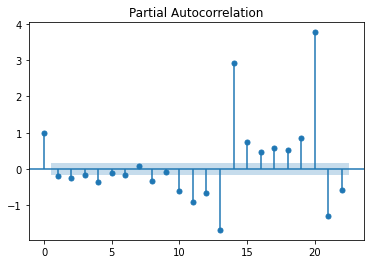

In [27]:
acf=plot_acf(df_airline["Passengers Second Difference"].dropna())
pacf=plot_pacf(df_airline["Passengers Second Difference"].dropna())

#### 2)plot graphs on 12 month diffrences

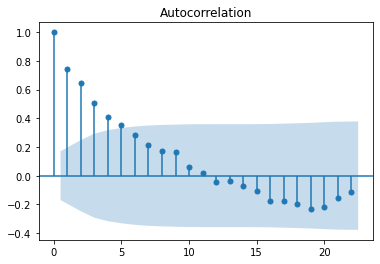

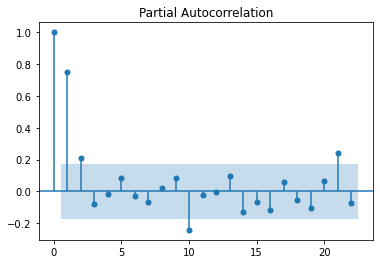

In [28]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [29]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [30]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [31]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [32]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [33]:
pred_end_date

Timestamp('1960-12-01 00:00:00')

In [34]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [35]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

C:\Users\Sai\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Sai\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [36]:
model_SARIMA_fit=model_SARIMA.fit()

C:\Users\Sai\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [37]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Fri, 02 Sep 2022   AIC                            548.481
Time:                                     12:52:35   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5984      0.937      0.638      0.523      -1.239       2.436
ar.L2          0.8311      0.232      3.581      0.000       0.376       1.286
ar.L3         -0.4526      0.894     -0.507      0.613      -2.204       1.299
ma.L1          0.1837      1.164      0.158      0.875      -2.097       2.465
ma.L2         -0.5342      1.262     -0.423      0.672      -3.007       1.938
ma.L3         -0.0986      0.384     -0.257      0.797      -0.851       0.654
ma.L4         -0.1272      0.337     -0.377      0.706      -0.788       0.534
ma.L5          0.2471      0.357      0.693      0.488      -0.452       0.946
sigma2        87.7321     81.097      1.082      0.279     -71.214     246.679
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [40]:
pred=model_SARIMA_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

In [41]:
residuals

Month
1956-01-01     -2.184891
1956-02-01     -4.277419
1956-03-01      7.083640
1956-04-01      2.323758
1956-05-01      6.665820
1956-06-01     19.051298
1956-07-01      9.603402
1956-08-01     19.930458
1956-09-01      5.556382
1956-10-01     -4.216006
1956-11-01     -1.561797
1956-12-01     -6.433317
1957-01-01     -4.954804
1957-02-01    -13.008544
1957-03-01     14.014756
1957-04-01      6.214263
1957-05-01     13.210679
1957-06-01     37.485362
1957-07-01     32.679202
1957-08-01     53.833152
1957-09-01     27.084802
1957-10-01     10.083651
1957-11-01      6.345177
1957-12-01     -1.805136
1958-01-01     -4.739354
1958-02-01    -20.117130
1958-03-01     -3.527654
1958-04-01    -16.693336
1958-05-01     -1.152425
1958-06-01     28.719442
1958-07-01     37.435867
1958-08-01     71.152427
1958-09-01      6.904794
1958-10-01      2.434349
1958-11-01     -7.825027
1958-12-01    -19.474188
1959-01-01     -2.950523
1959-02-01    -13.854620
1959-03-01     23.172043
1959-04-01     14.4

<AxesSubplot:xlabel='Month'>

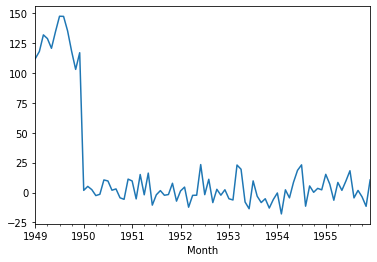

In [42]:
model_SARIMA_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

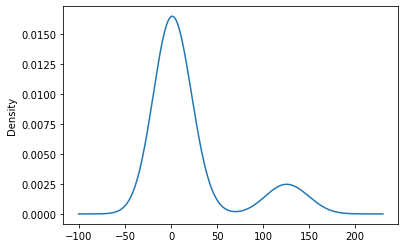

In [43]:
model_SARIMA_fit.resid.plot(kind='kde')

In [45]:
test_data['Predicted_SARIMA']=pred

<ipython-input-45-11869fe00ed6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred


In [46]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_SARIMA
Month,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,286.184891
1956-02-01,277.0,-7.0,-13.0,44.0,281.277419
1956-03-01,317.0,40.0,47.0,50.0,309.916360
1956-04-01,313.0,-4.0,-44.0,44.0,310.676242
1956-05-01,318.0,5.0,9.0,48.0,311.334180
1956-06-01,374.0,56.0,51.0,59.0,354.948702
1956-07-01,413.0,39.0,-17.0,49.0,403.396598
1956-08-01,405.0,-8.0,-47.0,58.0,385.069542
1956-09-01,355.0,-50.0,-42.0,43.0,349.443618


<AxesSubplot:xlabel='Month'>

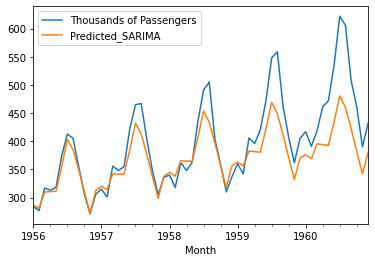

In [47]:
test_data[['Thousands of Passengers','Predicted_SARIMA']].plot()